In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_log_error

Transformando os dados em arrays: 

In [2]:
dataset = pd.read_csv('Simples_Carga_de_Energia_Dia_Hora_data.csv', sep= ';')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Visualizando os dados do dataframe:

In [3]:
dataset.head()

,Dia,Carga
0,1,56444
1,2,51166
2,3,59765
3,4,61327
4,5,61571


Visualizando a informação do dataframe: 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Dia     172 non-null    int64
 1   Carga   172 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


Criando a função de erro:

In [5]:
def rmsle(ytrue,ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[64228.98 66238.  ]
 [68382.3  54095.  ]
 [64635.29 68568.  ]
 [64274.13 67176.  ]
 [67434.26 74144.  ]
 [66305.64 68422.  ]
 [62107.18 57605.  ]
 [68788.61 57652.  ]
 [66486.22 70270.  ]
 [65809.05 70571.  ]
 [68021.15 73842.  ]
 [68246.87 70924.  ]
 [62016.89 61785.  ]
 [66170.21 66602.  ]
 [69149.77 74766.  ]
 [65989.63 54764.  ]
 [63280.94 66116.  ]
 [62603.77 65540.  ]
 [64545.   73987.  ]
 [64093.55 65193.  ]
 [64770.72 73686.  ]
 [63461.52 58266.  ]
 [61971.74 61571.  ]
 [67118.25 72912.  ]
 [64499.85 72685.  ]
 [66711.95 69382.  ]
 [67343.97 73797.  ]
 [68066.29 74163.  ]
 [66757.09 67880.  ]
 [68969.19 74381.  ]
 [62964.93 63544.  ]
 [64319.27 63373.  ]
 [67479.41 67705.  ]
 [63822.68 67781.  ]
 [62152.32 51896.  ]]


In [9]:
y_pred.reshape(len(y_pred),1)

array([[64228.98],
       [68382.3 ],
       [64635.29],
       [64274.13],
       [67434.26],
       [66305.64],
       [62107.18],
       [68788.61],
       [66486.22],
       [65809.05],
       [68021.15],
       [68246.87],
       [62016.89],
       [66170.21],
       [69149.77],
       [65989.63],
       [63280.94],
       [62603.77],
       [64545.  ],
       [64093.55],
       [64770.72],
       [63461.52],
       [61971.74],
       [67118.25],
       [64499.85],
       [66711.95],
       [67343.97],
       [68066.29],
       [66757.09],
       [68969.19],
       [62964.93],
       [64319.27],
       [67479.41],
       [63822.68],
       [62152.32]])

In [10]:
dataset["Carga"].values

array([56444, 51166, 59765, 61327, 61571, 61785, 62083, 57605, 51896,
       61439, 63689, 64535, 64604, 64867, 59609, 54103, 63036, 64937,
       65540, 65050, 63100, 57187, 51241, 60199, 61920, 62552, 63544,
       64228, 60155, 55334, 64665, 65471, 65695, 66116, 66602, 61396,
       55543, 58266, 66049, 68005, 69089, 69307, 64653, 58402, 67985,
       67781, 68305, 69121, 69059, 64291, 57334, 65193, 65474, 65244,
       66238, 67176, 63373, 59173, 69466, 70828, 72685, 73987, 75094,
       68568, 60443, 70676, 73686, 74885, 73707, 71917, 64394, 56122,
       58005, 68713, 71383, 69703, 68586, 63043, 57252, 66855, 69801,
       70155, 69717, 69274, 64317, 57902, 66955, 68850, 70603, 70571,
       67669, 60170, 53598, 54764, 63766, 64816, 65757, 66602, 62802,
       58187, 68422, 69143, 69910, 70111, 70270, 65613, 59596, 70601,
       71142, 69382, 67880, 65539, 61938, 57034, 67560, 70219, 71857,
       72804, 72912, 68082, 62105, 72562, 73442, 73797, 73661, 74144,
       67705, 59264,

Calculando o erro:

In [11]:
p = y_pred
error = rmsle(y_test, p) * 100
print('Mean Error =  %.2f' % np.mean(error), end='%' )


Mean Error =  9.15%

#Visualizando o gráfico da Previsão x Carga 
## Para o período de 01/ 08/ 2020 até 20 /01/ 2021

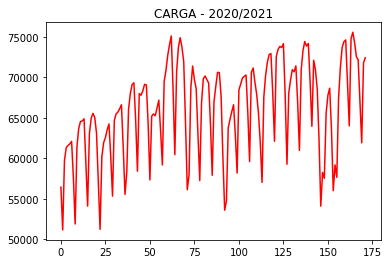

In [32]:
plt.plot(dataset["Carga"], color = 'red',label = 'Carga' )
plt.title("CARGA - 2020/2021")
plt.show()

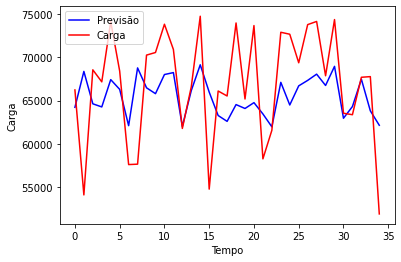

In [12]:

plt.plot(y_pred, color = 'blue', label = 'Previsão')
plt.plot(y_test, color = 'red',label = 'Carga' )

plt.xlabel('Tempo')
plt.ylabel('Carga')
plt.legend()
plt.show()